# Exploratory Data Analysis

Lets take a basic look at our Data. It's important to check the balance of our classes before we start a classification task.
Also, since we have images of both eyes per patient (assuming we don't have pirates in the dataset) we can check if retinopathy is more prevalent in either eye in this dataset. These answers can be found before we even start looking at the images.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
sns.set(style="white", palette="muted", color_codes=True)

In [2]:
path = os.path.join('data', 'trainLabels.csv')
df = pd.read_csv(path)

sample_labels = df[0:10] # 10 eyes in the sample set
train_labels = df[10:] # there are 35116 eyes, representing 17558 patients

In [3]:
df.head()

,image,level
0,10_left,0
1,10_right,0
2,13_left,0
3,13_right,0
4,15_left,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35126 entries, 0 to 35125
Data columns (total 2 columns):
image    35126 non-null object
level    35126 non-null int64
dtypes: int64(1), object(1)
memory usage: 548.9+ KB


## Check for class imbalance

% of total examples

In [5]:
counts = df.level.value_counts()
frequency = counts / len(df)
print "\n-----counts-----\n"
print counts, "\n"
print "\n-----frequencies-----\n"
print frequency


-----counts-----

0    25810
2     5292
1     2443
3      873
4      708
Name: level, dtype: int64 


-----frequencies-----

0    0.734783
2    0.150658
1    0.069550
3    0.024853
4    0.020156
Name: level, dtype: float64


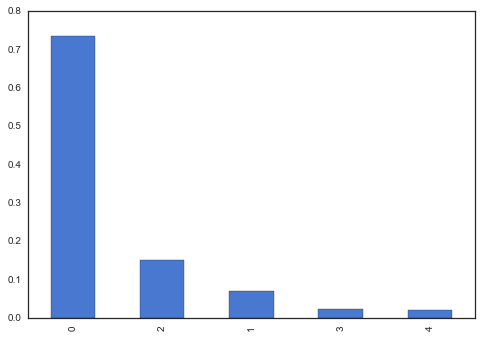

In [6]:
(frequency).plot.bar()
plt.show()

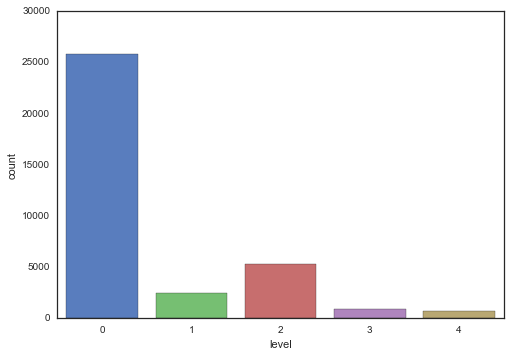

In [7]:
sns.countplot(df['level'])
plt.show()

The levels of Retinopathy in this dataset are:

`0 - No DR
1 - Mild
2 - Moderate
3 - Severe
4 - Proliferative DR`

Clearly, we have many more instances of normal eyes than eyes with retinopathy in our training set. Oddly class 2 retinopathy is more common than the other levels of severity. Kaggle claims these images were rated by clinicians in varying settings. Perhaps clinicians are avoiding giving out Mild or Severe ratings for some reason?

## Check if Retopathy if more prevalent in either eye

In [8]:
def which_eye(s):
    s = s.lower()
    if "left" in s:
        s = "left"
    else:
        s = "right"
    return s

In [9]:
df['eye'] = df['image'].apply(which_eye)

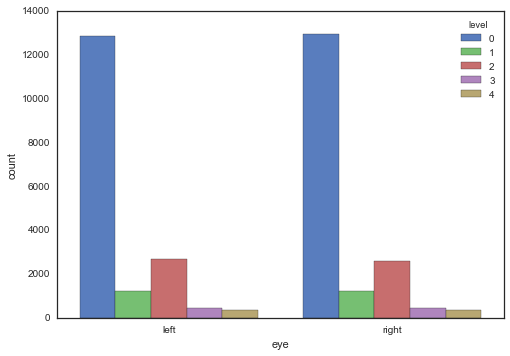

In [10]:
sns.countplot(x="eye", hue="level", data=df[['level', 'eye']])
plt.show()

Looks like if you have Retinopathy in one eye, you're very likely to have it in the other. I don't even need to check the raw numbers on this one. Sanity checks between patient numbers seem to support this claim.

## Pirate Check

In [11]:
print "num right eyes: ", len(df[df.eye == 'right'])
print "num left eyes: ", len(df[df.eye == 'left'])

num right eyes:  17563
num left eyes:  17563


we have the same number of left and right eyes. We could check that we have a right and left eye for each patient number but it seems reasable to assume Kaggle excluded pirates from this sample. Oh well, perhaps in the Titanic dataset.